In [6]:
import numpy as np
import os
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import nibabel as nib
from nibabel.testing import data_path
from scipy.ndimage import rotate

## Part 1. Load the MRI volumes. 


In [7]:
path = os.getcwd()
training_path = path + '/Data/Training'
validation_path = path + '/Data/Validation'
testing_path = path + '/Data/Testing'

# load images
img1 = nib.load(training_path + '/IBSR_01/images/analyze/IBSR_01_ana.img')
img2 = nib.load(training_path + '/IBSR_02/images/analyze/IBSR_02_ana.img')
img3 = nib.load(training_path + '/IBSR_03/images/analyze/IBSR_03_ana.img')
img4 = nib.load(training_path + '/IBSR_04/images/analyze/IBSR_04_ana.img')
img5 = nib.load(training_path + '/IBSR_05/images/analyze/IBSR_05_ana.img')
img6 = nib.load(training_path + '/IBSR_06/images/analyze/IBSR_06_ana.img')
img7 = nib.load(validation_path + '/IBSR_07/images/analyze/IBSR_07_ana.img')
img8 = nib.load(testing_path + '/IBSR_08/images/analyze/IBSR_08_ana.img')
img9 = nib.load(testing_path + '/IBSR_09/images/analyze/IBSR_09_ana.img')
img10 = nib.load(testing_path + '/IBSR_10/images/analyze/IBSR_10_ana.img')
img11 = nib.load(testing_path + '/IBSR_11/images/analyze/IBSR_11_ana.img')
img12 = nib.load(testing_path + '/IBSR_12/images/analyze/IBSR_12_ana.img')
img13 = nib.load(testing_path + '/IBSR_13/images/analyze/IBSR_13_ana.img')
img14 = nib.load(testing_path + '/IBSR_14/images/analyze/IBSR_14_ana.img')
img15 = nib.load(validation_path + '/IBSR_15/images/analyze/IBSR_15_ana.img')
img16 = nib.load(testing_path + '/IBSR_16/images/analyze/IBSR_16_ana.img')
img17 = nib.load(testing_path + '/IBSR_17/images/analyze/IBSR_17_ana.img')

# load segmentation image
img_seg1 = nib.load(training_path + '/IBSR_01/segmentation/analyze/IBSR_01_seg_ana.img')
img_seg2 = nib.load(training_path + '/IBSR_02/segmentation/analyze/IBSR_02_seg_ana.img')
img_seg3 = nib.load(training_path + '/IBSR_03/segmentation/analyze/IBSR_03_seg_ana.img')
img_seg4 = nib.load(training_path + '/IBSR_04/segmentation/analyze/IBSR_04_seg_ana.img')
img_seg5 = nib.load(training_path + '/IBSR_05/segmentation/analyze/IBSR_05_seg_ana.img')
img_seg6 = nib.load(training_path + '/IBSR_06/segmentation/analyze/IBSR_06_seg_ana.img')
img_seg7 = nib.load(validation_path + '/IBSR_07/segmentation/analyze/IBSR_07_seg_ana.img')
img_seg15 = nib.load(validation_path + '/IBSR_15/segmentation/analyze/IBSR_15_seg_ana.img')

In [8]:
# get information about each img
img_array = np.array([img1, img2, img3, img4, img5, img6, img7, img8, img9, 
                      img10, img11, img12, img13, img14, img15, img16, img17])
img_seg_array = np.array([img_seg1, img_seg2, img_seg3, img_seg4, 
                          img_seg5, img_seg6, img_seg7, img_seg15])

## Part 2. Determine the pixel spacing and slice thickness of each loaded volume.

In [9]:
# images
for i in range(len(img_array)): 
    header = img_array[i].header
    w = header['pixdim'][1]
    h = header['pixdim'][2]
    th = header['pixdim'][3]
    print('Image', i + 1, ':', ' width ' + str(w) + ' mm, height ' 
          + str(h) + ' mm, thickness ' + str(th) + ' mm')

Image 1 :  width 0.9375 mm, height 0.9375 mm, thickness 1.5 mm
Image 2 :  width 0.9375 mm, height 0.9375 mm, thickness 1.5 mm
Image 3 :  width 0.9375 mm, height 0.9375 mm, thickness 1.5 mm
Image 4 :  width 0.9375 mm, height 0.9375 mm, thickness 1.5 mm
Image 5 :  width 0.9375 mm, height 0.9375 mm, thickness 1.5 mm
Image 6 :  width 0.9375 mm, height 0.9375 mm, thickness 1.5 mm
Image 7 :  width 1.0 mm, height 1.0 mm, thickness 1.5 mm
Image 8 :  width 1.0 mm, height 1.0 mm, thickness 1.5 mm
Image 9 :  width 1.0 mm, height 1.0 mm, thickness 1.5 mm
Image 10 :  width 1.0 mm, height 1.0 mm, thickness 1.5 mm
Image 11 :  width 1.0 mm, height 1.0 mm, thickness 1.5 mm
Image 12 :  width 1.0 mm, height 1.0 mm, thickness 1.5 mm
Image 13 :  width 0.9375 mm, height 0.9375 mm, thickness 1.5 mm
Image 14 :  width 0.9375 mm, height 0.9375 mm, thickness 1.5 mm
Image 15 :  width 0.8370536 mm, height 0.8370536 mm, thickness 1.5 mm
Image 16 :  width 0.8370536 mm, height 0.8370536 mm, thickness 1.5 mm
Image 17 

In [10]:
# segmentation
for i in range(len(img_seg_array)): 
    header = img_seg_array[i].header
    w = header['pixdim'][1]
    h = header['pixdim'][2]
    th = header['pixdim'][3]
    print('Image', i + 1, ':', ' width ' + str(w) + ' mm, height ' 
          + str(h) + ' mm, thickness ' + str(th) + ' mm')

Image 1 :  width 0.9375 mm, height 0.9375 mm, thickness 1.5 mm
Image 2 :  width 0.9375 mm, height 0.9375 mm, thickness 1.5 mm
Image 3 :  width 0.9375 mm, height 0.9375 mm, thickness 1.5 mm
Image 4 :  width 0.9375 mm, height 0.9375 mm, thickness 1.5 mm
Image 5 :  width 0.9375 mm, height 0.9375 mm, thickness 1.5 mm
Image 6 :  width 0.9375 mm, height 0.9375 mm, thickness 1.5 mm
Image 7 :  width 1.0 mm, height 1.0 mm, thickness 1.5 mm
Image 8 :  width 0.8370536 mm, height 0.8370536 mm, thickness 1.5 mm


## Part 3. Extract, visualize, and save middle coronal slices for all training + validation cases. 

In [11]:
def get_middle_slice(img):
    img_data = img.get_fdata()
    slice_2 = img_data[:, :, len(img_data[0][0])//2]
    slice_2 = rotate(slice_2, 90)
    plt.imshow(slice_2.squeeze(), cmap = 'gray', origin = "lower")

Middle Coronal Slices for All Images


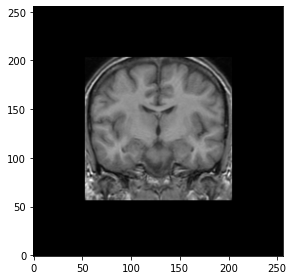

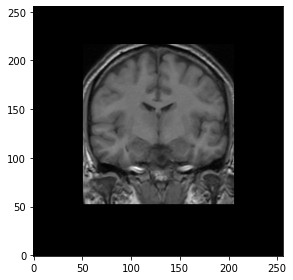

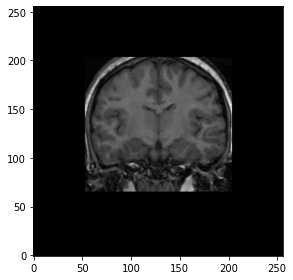

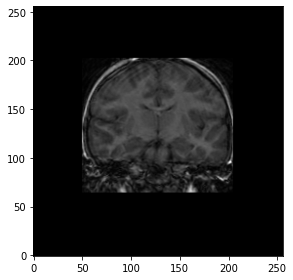

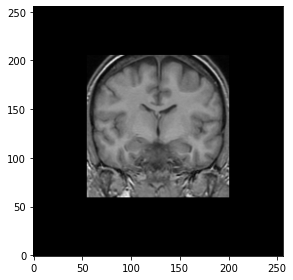

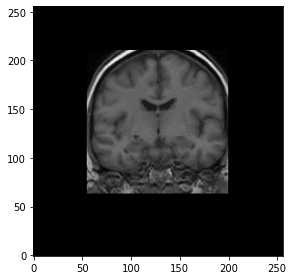

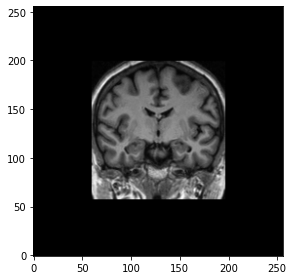

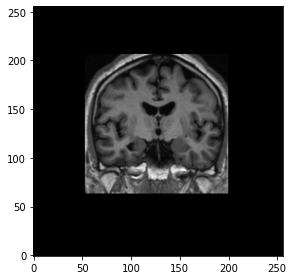

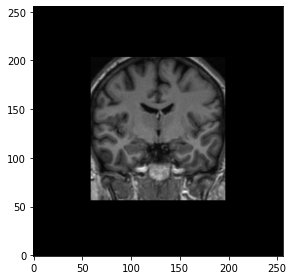

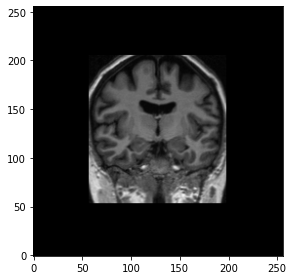

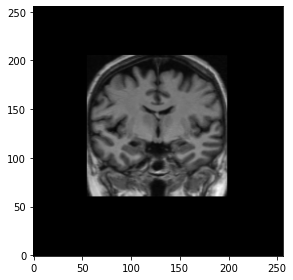

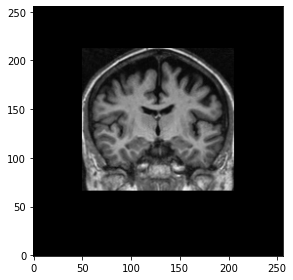

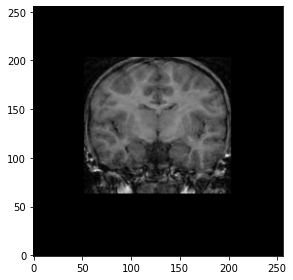

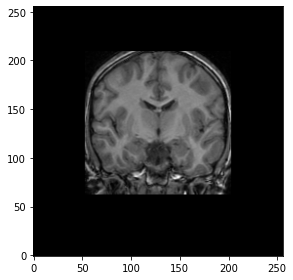

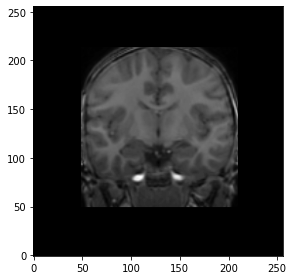

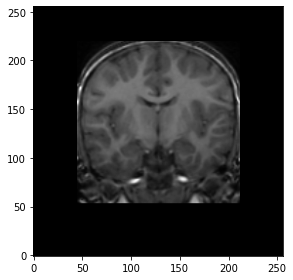

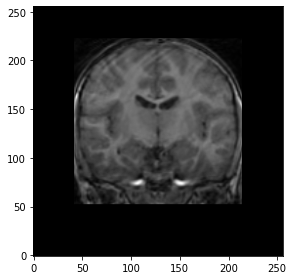

In [12]:
titles = ['01', '02', '03', '04', '05', '06', '07', '08', 
         '09', '10', '11', '12', '13', '14', '15', '16', '17']
print ('Middle Coronal Slices for All Images')
for i in range(len(img_array)):
    plt.figure()
    get_middle_slice(img_array[i])
    #plt.title('IBRS_' + titles[i] + ' Middle Coronal Slice')
    plt.tight_layout()
    plt.savefig('IBRS_' + titles[i] + '.png')

Middle Coronal Slices for Segmentations


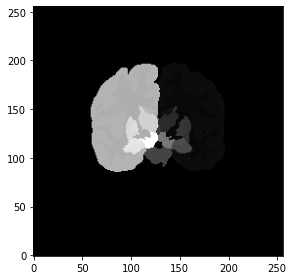

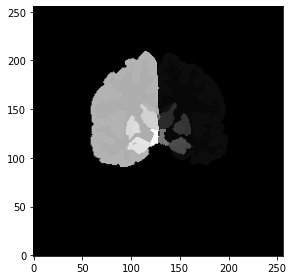

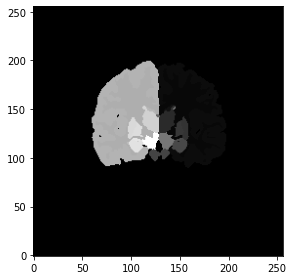

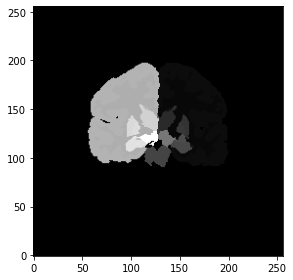

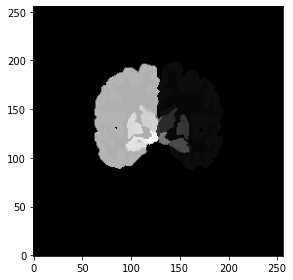

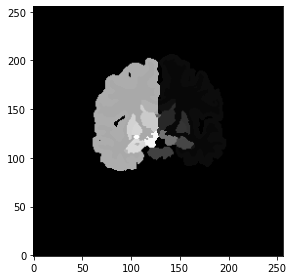

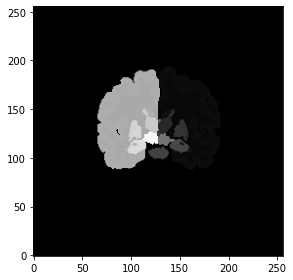

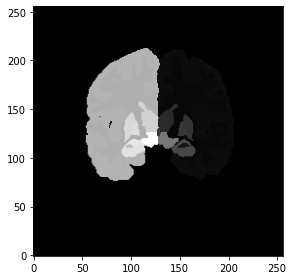

In [14]:
seg_titles = ['01', '02', '03', '04', '05', '06', '07', '15']
print ('Middle Coronal Slices for Segmentations')
for i in range(len(img_seg_array)):
    plt.figure()
    get_middle_slice(img_seg_array[i])
    #plt.title('Segmentation IBRS_' + titles[i] + ' Middle Coronal Slice')
    plt.tight_layout()